## Explore basic genome sequencing data string using input fasta file

### Fasta file for coronavirus 2 isolate Wuhan-Hu-1 found at 
https://www.ncbi.nlm.nih.gov/nuccore/1798174254/

#### Read in an input fasta file, a text-based format file representing either nucleotide (or amino acid) sequences, and get the sequence length and frequency of each nucleotide. 

In [4]:
# Import packages
import collections #use Counter package
import matplotlib.pylab as plt

In [18]:
def read_genome(filename):
    ''' read in a fasta file line by line omitting the first descriptive line that starts with 'r'
    input = fasta file
    output = genome file comprised of input fasta
    '''
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    f.close()
    return genome

def parse_fasta(filename):
    '''read in a fasta file line by line and parse it into the identifier and the content
    input = fasta file
    output = 2 lists; identifiers which has the descriptive line and contents which has each line 
    of fasta file as element in contents list
    '''
    identifiers = []
    contents = []
    with open(fname, "r") as fh:
        for line in fh:
            if line.startswith(">"):
                identifiers.append(line)
            else:
                contents.append(line)
    return identifiers, contents

genome = read_genome('sars2_isolate.fa')

#Print the first 100bp
print('The first 100 bp of genome is ', genome[:100])

#Length of genome
print('Sars2 isolate genome sequence has ', len(genome), ' base pairs')

#Frequency of each base in genome
collections.Counter(genome)

The first 100 bp of genome is  ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC
Sars2 isolate genome sequence has  29903  base pairs


Counter({'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492})

In [6]:
def reverse_complement(genome):
    ''' Function to get the reverse complement of your genome sequence
    '''
    complement_dict = {'A':'T', 'T':'A', 'C':'G', 'G':'C'}
    rev_string = ''
    for base in genome:
        rev_string = complement_dict[base] + rev_string
    return rev_string

rev_string = reverse_complement(genome)
print(genome[:100])

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC


The GC content of this genome is  0.3797277865097147 



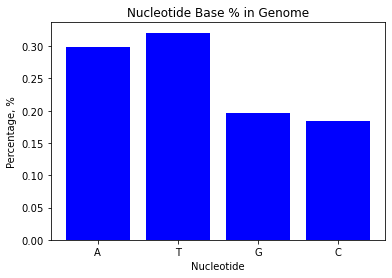

In [45]:
def gc_content(genome):
    '''Calculat the GC% of a given genome sequence using collection library
    input = genome sequence
    output = basecount per nucleotide and the GC% content of genome
    '''
    # Count nucleotides
    basecount = collections.Counter(genome)
    key_base_list = ['A','T','G','C']
    sum_basecount = sum(basecount[k] for k in key_base_list)
    
    # Calculat GC%
    key_gc_list = ['G','C']
    sum_gc = sum(basecount[k] for k in key_gc_list)
    gc_percent = sum_gc / float(sum_basecount)
    
    # Convert value in dictionary to percentage
    for key, value in basecount.items():
        newvalue = value/sum_basecount
        basecount[key] = newvalue

    return basecount, gc_percent 

basecount, gc_percent = gc_content(genome)

print("The GC content of this genome is ", gc_percent, "\n")
#Plotting the frequency of each base in genome
plt.title('Nucleotide Base % in Genome')
plt.xlabel('Nucleotide')
plt.ylabel('Percentage, %')
plt.bar(list(basecount.keys()), basecount.values(), color='b')
plt.show()